Iremos testar um dos arquivos considerando todas as quebras de linha

In [27]:
texto = []
fhandle = open('./dados/0.80S-49.02W-TAVG-Trend.txt')
for linha in fhandle:
    if linha.startswith('%'):
       texto.append(linha[1:])
print(texto)

# abrimos um arquivo como teste e visualizamos somente as linhas que começavam com %


[' This file contains an extracted local summary of land-surface \n', ' temperature results produced by the Berkeley Earth averaging \n', ' method for the location: \n', ' \n', '    0.80 S, 49.02 W\n', ' \n', ' The Berkeley Earth method takes temperature observations from a large \n', ' collection of weather monitoring stations and produces an estimate of \n', " the underlying global temperature field across all of the Earth's \n", ' land areas.  Once this temperature field has been generated, it is \n', ' possible to estimate the temperature evolution of individual locations \n', ' simply by sampling the field at the locaiton in question.  This \n', ' file contains such a local estimate.\n', ' \n', ' Temperatures are in Celsius and reported as anomalies relative to the \n', ' Jan 1951-Dec 1980 average.  Uncertainties represent the 95% confidence \n', ' interval for statistical noise and spatial undersampling effects.  Such \n', ' uncertainties are expected to account for the effects o

Iremos testar formas de extrair somente a latitude, a longitude e a cidade mais próxima da estação do texto

In [4]:
latitude_longitude = texto[4].split()

In [5]:
latitude_longitude

['0.80', 'S,', '49.02', 'W']

In [6]:
latitude = latitude_longitude[0] + latitude_longitude[1]
print(latitude) 

0.80S,


In [7]:
longitude = latitude_longitude[2] + latitude_longitude[3]
print(longitude)

49.02W


In [8]:
nearby_cities = texto[35].split(sep = ',')[0][18:] 


print(nearby_cities)

BelÃ©m


In [9]:
cidade_proxima = nearby_cities[0:18]
print(cidade_proxima)

BelÃ©m


Iremos montar a função que tenha como entrada o nome de arquivo de dado e retorne a latitude, a longitude e a cidade mais próxima da estação e testaremos novamente

In [10]:
import numpy as np
import glob
arquivos = glob.glob('dados/*.txt')

In [11]:
print(arquivos)

['dados\\0.80S-49.02W-TAVG-Trend.txt', 'dados\\10.45S-48.27W-TAVG-Trend.txt', 'dados\\13.66S-38.81W-TAVG-Trend.txt', 'dados\\15.27S-47.50W-TAVG-Trend.txt', 'dados\\2.41S-60.27W-TAVG-Trend.txt', 'dados\\20.09S-44.36W-TAVG-Trend.txt', 'dados\\20.09S-54.60W-TAVG-Trend.txt', 'dados\\23.31S-42.82W-TAVG-Trend.txt', 'dados\\23.31S-46.31W-TAVG-Trend.txt', 'dados\\24.92S-49.66W-TAVG-Trend.txt', 'dados\\29.74S-51.69W-TAVG-Trend.txt', 'dados\\4.02S-40.98W-TAVG-Trend.txt', 'dados\\brazil-TAVG-Trend.txt']


In [33]:
import numpy as np
def nome(arquivo):
    texto = []
    fhandle = open(arquivo,encoding='UTF-8')
    for linha in fhandle:
         if linha.startswith('%'):
             texto.append(linha[1:])
    latitude_longitude = texto[4].split()
    latitude = latitude_longitude[0] + latitude_longitude[1]
    longitude = latitude_longitude[2] + latitude_longitude[3]
    nearby_cities = texto[35].split(sep = ',')[0][18:] 
    cidade_proxima = nearby_cities[0:18]
    return (latitude,longitude,cidade_proxima)

# criamos uma função para visualizar somente as linhas que começavam com %
# 'UTF-8' é para aparecer caracteres especiais 
# latitude_longitude é a parte do texto que tem as cordernadas e colocamos o .split para poder mexer com cada palavra na frase
# latitude é a parte que contém somente a latitude
# longitude é a parte que contém somente a longitude
# cidade_proxima é a variável que contém a primeira cidade mais próxima
    

In [34]:
for arquivo in arquivos[0:12]:
    print(nome(arquivo))


('0.80S,', '49.02W', 'Belém')
('10.45S,', '48.27W', 'Palmas')
('13.66S,', '38.81W', 'Salvador')
('15.27S,', '47.50W', 'Brasília')
('2.41S,', '60.27W', 'Manaus')
('20.09S,', '44.36W', 'Belo Horizonte')
('20.09S,', '54.60W', 'Campo Grande')
('23.31S,', '42.82W', 'Rio de Janeiro')
('23.31S,', '46.31W', 'São Paulo')
('24.92S,', '49.66W', 'Curitiba')
('29.74S,', '51.69W', 'Porto Alegre')
('4.02S,', '40.98W', 'Fortaleza')


Criaremos uma função que tenha como entrada o nome de um arquivo e retorne a estimativa da temperatura anual, que será a soma da temperatura absoluta estimada com a anomalia anual

In [14]:
est_temp_abs = []
contador = []
count = -1
for indice_lista in texto:
    count = count + 1
    if 'absolute temperature' in indice_lista:
        est_temp_abs.append(indice_lista)
        contador.append(count)


In [15]:
print(est_temp_abs)
print(contador)
contador

[' Estimated Jan 1951-Dec 1980 absolute temperature (C): 26.74 +/- 0.81\n', ' Estimated Jan 1951-Dec 1980 monthly absolute temperature (C):\n']
[47, 49]


[47, 49]

In [16]:
print(est_temp_abs[0])

 Estimated Jan 1951-Dec 1980 absolute temperature (C): 26.74 +/- 0.81



In [17]:
frase = est_temp_abs[0].split()

In [18]:
frase

['Estimated',
 'Jan',
 '1951-Dec',
 '1980',
 'absolute',
 'temperature',
 '(C):',
 '26.74',
 '+/-',
 '0.81']

In [19]:
frase[7]

'26.74'

In [20]:
estimativa_anual = frase[7]

In [35]:
def est_anual(arquivo):
    coluna = np.loadtxt(arquivo, comments = '%')
    coluna_anomalia =np.nan_to_num(coluna[:,4])
    a=open(arquivo)
    texto = []
    for linha in a:
        if linha.startswith('%'):
            texto.append(linha[1:])
    est_temp_abs = []
    contador = []
    count = -1
    for indice_lista in texto:
        count = count + 1
        if 'absolute temperature' in indice_lista:
            est_temp_abs.append(indice_lista)
            contador.append(count)
    frase = est_temp_abs[0].split()
    converter = float (frase[7]) 
    final = converter + coluna_anomalia
    return (final)

# coluna carrega os dados numéricos que não tem % na linha
# coluna_anomalia converte nan para 1 da coluna 4 dos dados carregados que é a coluna de anomalia de temperatura
# a abre o arquivo e usamos um loop para usar somente as linhas que começam com %
# abrimos a variável vazia est_temp_abs para contar a partir do 0
# frase é a variável que pega a linha da temperatura estimada absoluta com .split para pegar cada parte da frase
# converter converte a string frase para float
# final soma a coluna de anomalia de temperatura com a temperatura absoluta

In [22]:
for arquivo in arquivos[0:12]:
    print(est_anual(arquivo))

[ 26.74   26.74   25.868 ...,  26.74   26.74   26.74 ]
[ 26.15   26.15   25.061 ...,  26.15   26.15   26.15 ]
[ 24.87   24.87   23.763 ...,  24.87   24.87   24.87 ]
[ 21.91   21.91   20.847 ...,  21.91   21.91   21.91 ]
[ 26.72  26.72  26.72 ...,  26.72  26.72  26.72]
[ 21.26   21.26   20.232 ...,  21.26   21.26   21.26 ]
[ 23.68   23.68   22.622 ...,  23.68   23.68   23.68 ]
[ 24.01   24.01   22.961 ...,  24.01   24.01   24.01 ]
[ 19.9    19.9    18.857 ...,  19.9    19.9    19.9  ]
[ 17.6    17.6    16.538 ...,  17.6    17.6    17.6  ]
[ 18.41   18.41   17.306 ...,  18.41   18.41   18.41 ]
[ 27.08   27.08   26.243 ...,  27.08   27.08   27.08 ]


Iremos criar uma função para plotar os gráficos de Temperatura anual estimada e  ano decimal

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import glob
arquivos = glob.glob('dados/*.txt')

In [36]:
def plotar_graficos(arquivo):
    dados= np.loadtxt(arquivo, comments='%')
    anos = dados[:, 0]
    meses = dados[:, 1]
    estimativa_anual = est_anual(arquivo)
    ano_decimal = (meses - 1)/12 + anos
    plt.figure()
    plt.plot(ano_decimal, estimativa_anual, 'k-')
    plt.title(nome(arquivo)[0:2])
    plt.xlabel('Ano')
    plt.ylabel('Temperatura Anual Estimada(°C)')
    plt.savefig(nome(arquivo)[2] +'.png')

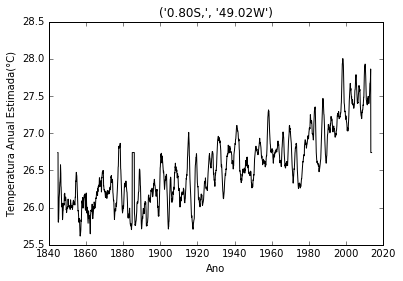

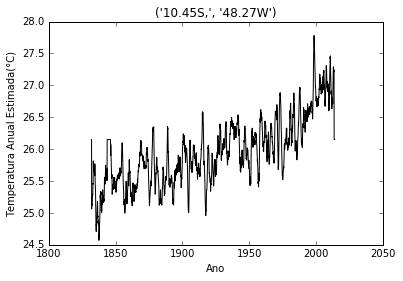

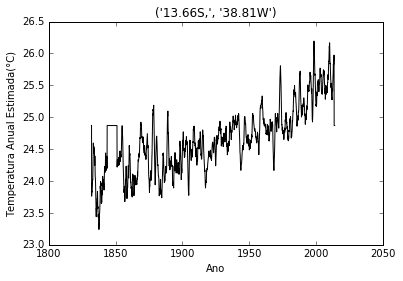

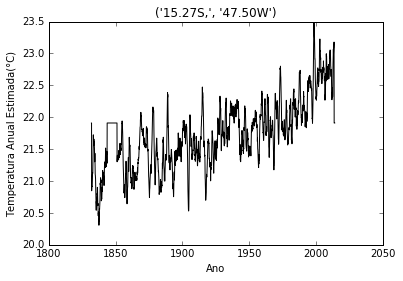

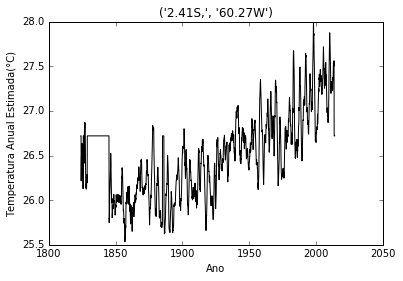

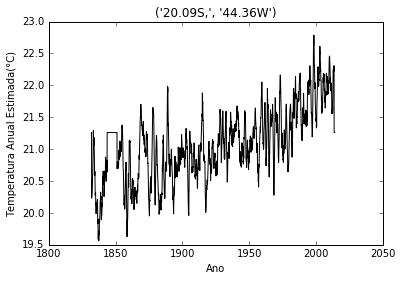

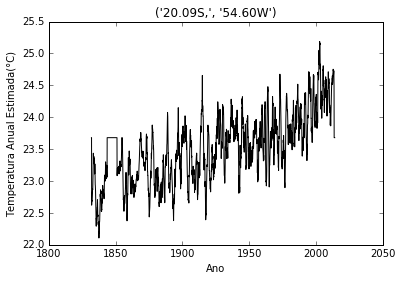

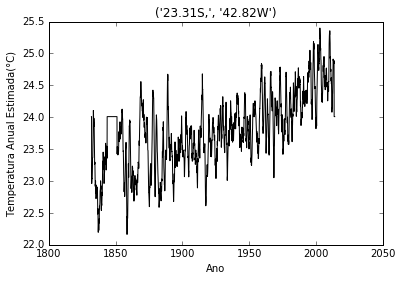

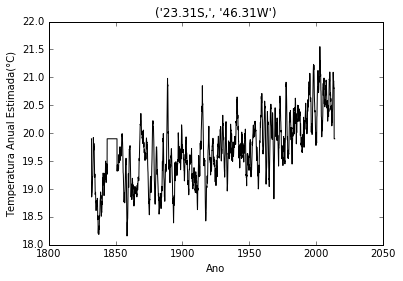

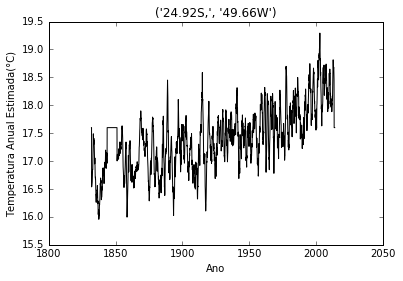

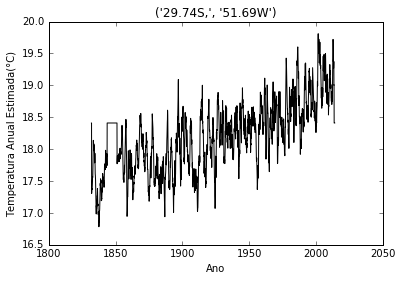

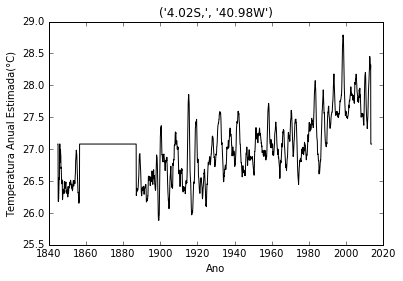

In [26]:
 for arquivo in arquivos:
        if arquivo !='dados\\brazil-TAVG-Trend.txt':
            plotar_graficos(arquivo)